In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from time import time



data  = load_digits()

(n_samples, n_features), n_digits = data.data.shape, np.unique(data.target_names).size

print(f"# digitos: {n_digits}; # amostra: {n_samples}; # características: {n_features}")

#print(data.data.shape)
data.feature_names

#plt.gray()
#plt.matshow(data.images[1])
#plt.show()

# digitos: 3; # amostra: 178; # características: 13


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# K-Means

t0 = time()
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)

df = kmeans.fit_transform(data.data)

t1 = time()
print(t1 - t0)
label = kmeans.fit_predict(df)

0.4957430362701416


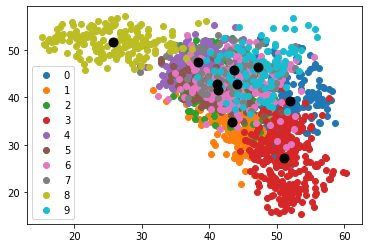

In [ ]:
#Visualizando os dados com o K-Means

centroids = kmeans.cluster_centers_
u_labels = np.unique(data.target_names)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
# PCA e K-Means

t0 = time()
reduced_data = PCA(n_components=2).fit_transform(data.data)
t1_pca = time()
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)
t1_kmeans = time()
t1 = time()

print('tempo total: ', t1 - t0)
print('tempo PCA: ', t1_pca - t0)
print('tempo KMeans: ', t1_kmeans - t0)



tempo total:  0.30645203590393066
tempo PCA:  0.03943991661071777
tempo KMeans:  0.30642247200012207


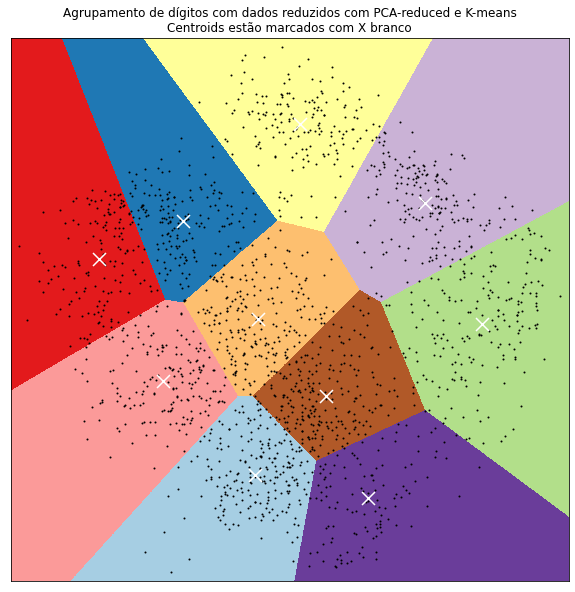

In [ ]:
#Visualizando os dados com o PCA e K-Means


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#plt.figure(1)
plt.figure(figsize=(10,10))
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "Agrupamento de dígitos com dados reduzidos com PCA-reduced e K-means\n"
    "Centroids estão marcados com X branco"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()